#NEURAL NETWORK - A SIMPLE PERCEPTION


#Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

- Deep Learning is a subset of machine learning that uses artificial neural networks with multiple layers (deep neural networks) to automatically learn complex patterns from large amounts of data. It mimics how the human brain processes information, especially for tasks like image recognition, speech, and natural language understanding.

- Evolution:-

    - Deep learning evolved from early neural network models like the perceptron (1950s). Progress was slow due to limited data and computing power. The field advanced significantly in the 2000s with the availability of big data, powerful GPUs, and improved algorithms like backpropagation and activation functions (ReLU). Breakthroughs such as AlexNet (2012) showed dramatic improvements in image recognition, leading to widespread adoption.

- Difference from Traditional Machine Learning:  
    - Traditional machine learning relies heavily on manual feature engineering, where humans define important features before training models like linear regression, decision trees, or SVMs. In contrast, deep learning automatically learns features directly from raw data through multiple layers.    

#Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?    

- Basic Architecture:
A perceptron is the simplest neural network model, used for binary classification.

- Functioning:

    - Inputs are multiplied by their corresponding weights.

    - The weighted inputs are summed and bias is added.

    - The activation function compares the result with a threshold.

    - If the value exceeds the threshold, output is 1; otherwise, output is 0.
Limitations:

   - Can only solve linearly separable problems

   - Fails on problems like XOR

   - Uses a binary output, not suitable for complex tasks

   - Cannot handle non-linear decision boundaries

  - Very limited learning capacity compared to modern neural networks



#Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

- Purpose of Activation Function

   - The activation function introduces non-linearity into a neural network. Without it, a neural network—no matter how many layers—would behave like a simple linear model, which is useless for learning complex patterns. Activation functions decide whether a neuron should fire and how strongly it should contribute to the final output.

- Comparison: Sigmoid vs Tanh vs ReLU
1. Sigmoid Function

   - Range: (0, 1)

   - Use: Binary classification (output layer)

   - Pros:

       - Smooth and probabilistic interpretation

    - Cons:

        - Vanishing gradient problem

        - Not zero-centered

        - Slow convergence

#Question 4: What is the difference between Loss function and Cost function in neural networks? Provide examples.

- Loss Function vs Cost Function (Straight answer, no fluff)
Loss Function

  - What it is:
      - Measures error for a single training example.

  - Purpose:
       - Tells the model how wrong it is on one data point.

  - Used during:
       - Backpropagation for each sample.

  - Examples:

       - Mean Squared Error        
       - Binary Cross-Entropy     

- Cost Function

   - What it is:
        - Aggregation (average or sum) of the loss over the entire dataset.

   - Purpose:
         - Represents the overall performance of the neural network.

   - Used during:
         - Optimization (gradient descent minimizes this).       

#Question 5: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.         

- Role of Optimizers in Neural Networks

Optimizers are algorithms that update the weights and biases of a neural network to minimize the loss (cost) function. They control how fast, in which direction, and how stably the model learns. Without an optimizer, your network just computes errors and does nothing useful.

- In short: optimizers decide how learning happens.

 - Comparison: Gradient Descent vs RMSprop vs Adam
1. Gradient Descent (Basic / Vanilla GD)

   - How it works:
       - Updates parameters using the gradient of the loss function.
    - Pros:

         - Simple and mathematically clean

         - Guaranteed convergence for convex problems

    - Cons:

         - Slow

         - Sensitive to learning rate

         - Gets stuck in local minima or saddle points



---


#● Use NumPy, Matplotlib, and Tensorflow/Keras for implementation.


---


#Question 6: Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.
         

In [1]:
import numpy as np

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])

weights = np.random.rand(2)
bias = np.random.rand()

lr = 0.1
epochs = 20

def step_function(z):
    return 1 if z >= 0 else 0

for epoch in range(epochs):
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        y_pred = step_function(z)

        error = y[i] - y_pred

        weights += lr * error * X[i]
        bias += lr * error

print("Trained Weights:", weights)
print("Trained Bias:", bias)

print("\nAND Gate Predictions:")
for i in range(len(X)):
    z = np.dot(X[i], weights) + bias
    output = step_function(z)
    print(f"Input: {X[i]} Output: {output}")


Trained Weights: [0.21054993 0.32697303]
Trained Bias: -0.5069983424576396

AND Gate Predictions:
Input: [0 0] Output: 0
Input: [0 1] Output: 0
Input: [1 0] Output: 0
Input: [1 1] Output: 1


#Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.


Text(0.5, 1.0, 'Activation')

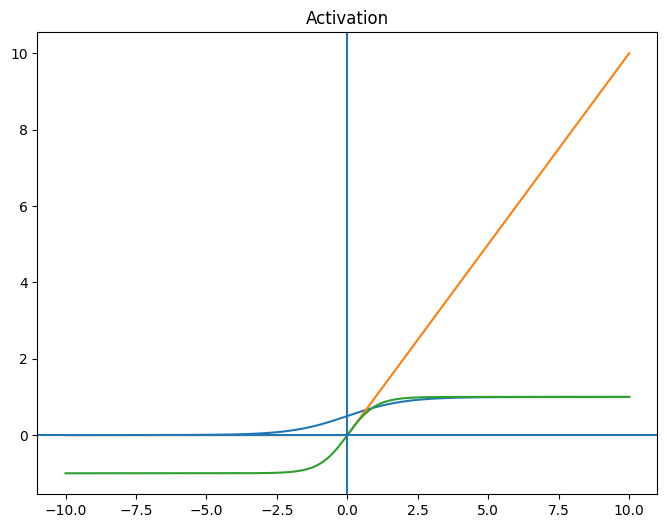

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10, 10, 400)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

plt.figure(figsize=(8, 6))

plt.plot(x, y_sigmoid, label='Sigmoid')
plt.plot(x, y_relu, label='ReLU')
plt.plot(x, y_tanh, label='Tanh')

plt.axhline(0)
plt.axvline(0)

plt.title("Activation" )


#Question 8: Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=32,
    verbose=1
)

training_accuracy = history.history['accuracy'][-1]
print(f"\nTraining Accuracy: {training_accuracy * 100:.2f}%")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8808 - loss: 0.4168
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9662 - loss: 0.1102
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9764 - loss: 0.0754
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9835 - loss: 0.0497
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9873 - loss: 0.0379

Training Accuracy: 98.61%


#Question 9: Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7780 - loss: 0.6297 - val_accuracy: 0.8514 - val_loss: 0.4136
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8677 - loss: 0.3670 - val_accuracy: 0.8588 - val_loss: 0.3883
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8777 - loss: 0.3308 - val_accuracy: 0.8654 - val_loss: 0.3657
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8869 - loss: 0.3041 - val_accuracy: 0.8698 - val_loss: 0.3549
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8967 - loss: 0.2846 - val_accuracy: 0.8773 - val_loss: 0.3431
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8993 - loss: 0.2714 - val_accuracy: 0.8784 - val_loss: 0.3338
Epoch 7/10
1875/1875 ━━━━━━━━━━

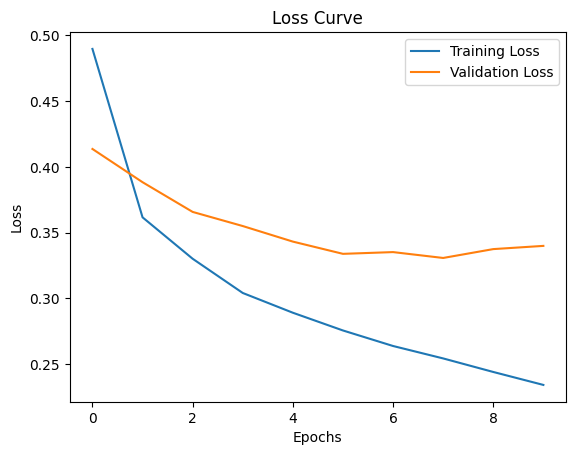

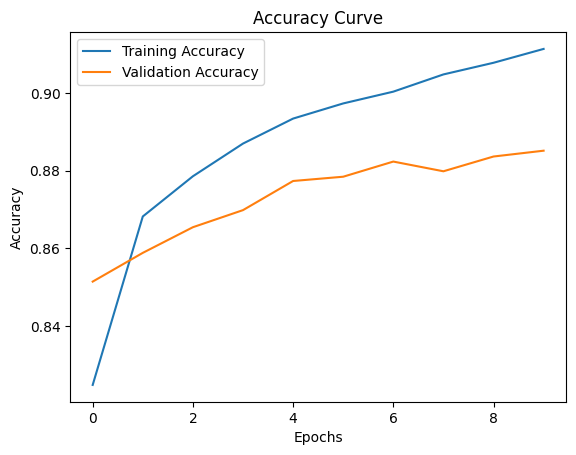

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.show()


#Question 10: You are working on a project for a bank that wants to automatically detect fraudulent transactions. The dataset is large, imbalanced, and contains structured features like transaction amount, merchant ID, and customer location. The goal is to classify each transaction as fraudulent or legitimate. Explain your real-time data science workflow:
#● How would you design a deep learning model (perceptron or multilayer NN)?

#● Which activation function and loss function would you use, and why?

#● How would you train and evaluate the model, considering class imbalance?

#● Which optimizer would be suitable, and how would you prevent overfitting


-ANSWER :-
  - Fraud detection is a binary classification problem where the data is large imbalanced and mostly structured. A single layer perceptron is not suitable because fraud patterns are complex and not linearly separable. I would use a multilayer neural network with a few dense hidden layers. The input layer would take features like transaction amount merchant information customer location and time based features. Two to four hidden layers are enough for structured banking data. The output layer would have one neuron to predict whether the transaction is fraud or not.

- For activation functions I would use ReLU in the hidden layers because it is fast and helps the model learn complex non linear patterns. In the output layer I would use Sigmoid because the task is binary classification and it gives a probability between zero and one. For the loss function I would use Binary Cross Entropy because it works well for binary classification and penalizes confident wrong predictions.

 - Since the dataset is highly imbalanced I would not rely on accuracy. I would handle imbalance using class weights so that fraud transactions get more importance during training. For evaluation I would focus on recall precision F1 score and ROC AUC because catching fraud is more important than overall accuracy.